In [1]:
from google.colab.drive import mount
mount("/content/drive/")

Mounted at /content/drive/


<h1 style="color: red"> Bayer AG Stock Market Predictor</h1>
<p style="text-align: center"> Amna Ejaz and Jose M. Serra Jr.</p>
<p style="text-indent: 50px"> Using techinques taught in the Machine Learning course one will attempt a project which will use a regression algorithm to predict stock market values for BAYR index in the stock market. We will design, build, and test a regression algorithm with two validation tested algorithm one with past year (2020), and the other with the first few months of this year.</p>

<h1 style="color: Green">Importing libraries</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplplt
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.callbacks
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
# scikit-learn bootstrap
from sklearn.utils import resample

<h1 style="color: maroon"> Reading the data file for BAYRY and NYStock </h1>

In [ ]:
BAYRY_stock_hist = pd.read_csv("C:\\Users\\19088\\Desktop\\Math3790\\Assignments\\Final_Project\\project_data_finance\\Data\\MASTERBAYRY.csv" , index_col="Date", parse_dates =True)
NYSE_stock_hist = pd.read_csv("C:\\Users\\19088\\Desktop\\Math3790\\Assignments\\Final_Project\\project_data_finance\\Data\\NYAIndexMaster.csv", index_col="Date", parse_dates =True)

<h3 style="color:brown"> Data Exploration for BAYRY Stock </h3>

In [ ]:
BAYRY_stock_hist.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-11-18,9.625,9.6875,9.50000,9.625,5.330023,98400
1996-11-19,9.750,9.7500,9.53125,9.750,5.399244,45200


In [ ]:
BAYRY_stock_hist.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-08,15.97,15.98,15.90,15.93,15.93,306000
2021-04-09,15.92,15.94,15.87,15.92,15.92,207000


<h3 style="color: indigo">Changing name of columns for BAYRY stock</h3>

In [ ]:
BAYRY_stock_hist.columns = ["Open_BAYRY", "High_BAYRY","Low_BAYRY","Close_BAYRY", "Adj_Close_BAYRY","Volume_BAYRY"]

In [ ]:
BAYRY_stock_hist

,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY
Date,,,,,,
1996-11-18,9.625000,9.687500,9.50000,9.625000,5.330023,98400
1996-11-19,9.750000,9.750000,9.53125,9.750000,5.399244,45200
1996-11-20,9.750000,9.812500,9.62500,9.750000,5.399244,32000
1996-11-21,9.781250,9.812500,9.65625,9.781250,5.416549,54400
1996-11-22,9.812500,9.843750,9.68750,9.812500,5.433855,32800
...,...,...,...,...,...,...
2021-04-05,16.049999,16.150000,15.73000,16.080000,16.080000,332800
2021-04-06,15.950000,16.059999,15.92000,16.030001,16.030001,520200
2021-04-07,15.960000,16.030001,15.93000,15.980000,15.980000,240400


###  Summary for BAYRY stock

In [ ]:
BAYRY_stock_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
Open_BAYRY,6138.0,17.081926,8.846872,2.712500,9.968750,15.438750,21.734376,3.906750e+01
High_BAYRY,6138.0,17.222197,8.880307,2.812500,10.062500,15.615000,21.904375,3.919250e+01
Low_BAYRY,6138.0,16.944139,8.815163,2.700000,9.843750,15.290000,21.579375,3.878750e+01
Close_BAYRY,6138.0,17.092752,8.853876,2.810000,9.968750,15.460000,21.690001,3.899250e+01
Adj_Close_BAYRY,6138.0,13.108723,8.291310,1.640303,5.606907,11.961944,18.618596,3.201624e+01
Volume_BAYRY,6138.0,389853.176931,569532.107592,0.000000,92100.000000,216000.000000,457200.000000,1.143840e+07


In [ ]:
pd.DataFrame(BAYRY_stock_hist.dtypes).T

,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY
0,float64,float64,float64,float64,float64,int64


### Data exploration for NY stock

In [ ]:
NYSE_stock_hist.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-11-18,4122.700195,4122.700195,4122.700195,4122.700195,4122.700195,0
1996-11-19,4142.790039,4142.790039,4142.790039,4142.790039,4142.790039,0


In [ ]:
NYSE_stock_hist.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-08,15838.849609,15894.799805,15812.370117,15886.559570,15886.559570,3901910000
2021-04-09,15886.559570,15956.379883,15865.599609,15956.370117,15956.370117,3634910000


<h3 style= "color: purple"> Changing names for NY stock columns</h3>

In [ ]:
NYSE_stock_hist.columns = ["Open_NYSE", "High_NYSE","Low_NYSE","Close_NYSE", "Adj_Close_NYSE","Volume_NYSE"]

In [ ]:
NYSE_stock_hist.describe().T

,count,mean,std,min,25%,50%,75%,max
Open_NYSE,6138.0,8.461410e+03,2.595586e+03,4027.01001,6.456175e+03,7.919420e+03,1.048545e+04,1.588656e+04
High_NYSE,6138.0,8.498326e+03,2.608469e+03,4027.01001,6.469615e+03,7.966495e+03,1.053145e+04,1.595638e+04
Low_NYSE,6138.0,8.420711e+03,2.581206e+03,4027.01001,6.443068e+03,7.864465e+03,1.043012e+04,1.586560e+04
Close_NYSE,6138.0,8.462213e+03,2.595705e+03,4027.01001,6.456658e+03,7.920335e+03,1.048930e+04,1.595637e+04
Adj_Close_NYSE,6138.0,8.462213e+03,2.595705e+03,4027.01001,6.456658e+03,7.920335e+03,1.048930e+04,1.595637e+04
Volume_NYSE,6138.0,2.740192e+09,1.846064e+09,0.00000,1.337400e+09,3.060185e+09,3.905618e+09,1.145623e+10


In [ ]:
pd.DataFrame(NYSE_stock_hist.dtypes).T

,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
0,float64,float64,float64,float64,float64,int64


In [ ]:
NYSE_stock_hist

,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
Date,,,,,,
1996-11-18,4122.700195,4122.700195,4122.700195,4122.700195,4122.700195,0
1996-11-19,4142.790039,4142.790039,4142.790039,4142.790039,4142.790039,0
1996-11-20,4153.359863,4153.359863,4153.359863,4153.359863,4153.359863,0
1996-11-21,4147.549805,4147.549805,4147.549805,4147.549805,4147.549805,0
1996-11-22,4173.029785,4173.029785,4173.029785,4173.029785,4173.029785,0
...,...,...,...,...,...,...
2021-04-05,15752.240234,15882.099609,15752.240234,15870.339844,15870.339844,3999760000
2021-04-06,15870.339844,15920.280273,15842.250000,15877.959961,15877.959961,4027880000
2021-04-07,15877.959961,15905.250000,15804.450195,15838.849609,15838.849609,4112640000


<h3 style="color:purple"> Merge BAYRY and NY stock by date column <h3>

In [ ]:
master = BAYRY_stock_hist.merge(NYSE_stock_hist, how= "inner", on= "Date")
master.head(2)

,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
Date,,,,,,,,,,,,
1996-11-18,9.625,9.6875,9.50000,9.625,5.330023,98400,4122.700195,4122.700195,4122.700195,4122.700195,4122.700195,0
1996-11-19,9.750,9.7500,9.53125,9.750,5.399244,45200,4142.790039,4142.790039,4142.790039,4142.790039,4142.790039,0


In [ ]:
master.tail(2)

,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
Date,,,,,,,,,,,,
2021-04-08,15.97,15.98,15.90,15.93,15.93,306000,15838.849609,15894.799805,15812.370117,15886.559570,15886.559570,3901910000
2021-04-09,15.92,15.94,15.87,15.92,15.92,207000,15886.559570,15956.379883,15865.599609,15956.370117,15956.370117,3634910000


<h2 style="color:green"> Preprocessing Data </h2>

<p style="text-indent: 40px"> Split the data into three parts training set, validation set, and test set. <p>

In [ ]:
# Train set split the data by dates less then and equal to '2000-07-03'
train_df = master['1996-11-18':'2000-07-03']
# Validation split the data between dates greater then "2000-07-03 and less than 2009-04-30"
validation_df = master['2000-07-30' : '2009-04-30']
# Test set split the data from date greater and equal to "2009-04-30"
test_df =  master['2009-04-30':]

In [ ]:
test_df

,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
Date,,,,,,,,,,,,
2009-04-30,12.450000,12.512500,12.3250,12.365000,8.578891,118400,5516.149902,5622.229980,5494.180176,5513.359863,5513.359863,6862540000
2009-05-01,12.415000,12.547500,12.3025,12.497500,8.670820,59600,5513.359863,5588.589844,5492.870117,5568.759766,5568.759766,5312170000
2009-05-04,12.662500,12.830000,12.6625,12.792500,8.875490,332800,5568.759766,5801.600098,5568.759766,5800.220215,5800.220215,7038840000
2009-05-05,12.925000,12.925000,12.6250,12.670000,8.790502,91600,5800.220215,5800.299805,5726.879883,5770.759766,5770.759766,6882860000
2009-05-06,12.677500,12.722500,12.5600,12.637500,8.767952,181200,5770.759766,5900.759766,5770.759766,5890.549805,5890.549805,8555040000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,16.049999,16.150000,15.7300,16.080000,16.080000,332800,15752.240234,15882.099609,15752.240234,15870.339844,15870.339844,3999760000
2021-04-06,15.950000,16.059999,15.9200,16.030001,16.030001,520200,15870.339844,15920.280273,15842.250000,15877.959961,15877.959961,4027880000
2021-04-07,15.960000,16.030001,15.9300,15.980000,15.980000,240400,15877.959961,15905.250000,15804.450195,15838.849609,15838.849609,4112640000


<h3 style="color:teal">Split date column into month, year, and day</h3>

In [ ]:
'''
train_date,validation_df, test_date = train_df.pop('Date'), validation_df.pop('Date'), test_df.pop('Date')
def date_data_creator(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
for i in [train_df,validation_df,test_df]:
    date_data_creator(i)
    '''

"\ntrain_date,validation_df, test_date = train_df.pop('Date'), validation_df.pop('Date'), test_df.pop('Date')\ndef date_data_creator(df):\n    df['Date'] = pd.to_datetime(df['Date'])\n    df['year'] = df['Date'].dt.year\n    df['month'] = df['Date'].dt.month\n    df['day'] = df['Date'].dt.day\nfor i in [train_df,validation_df,test_df]:\n    date_data_creator(i)\n    "

In [ ]:
test_df

,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
Date,,,,,,,,,,,,
2009-04-30,12.450000,12.512500,12.3250,12.365000,8.578891,118400,5516.149902,5622.229980,5494.180176,5513.359863,5513.359863,6862540000
2009-05-01,12.415000,12.547500,12.3025,12.497500,8.670820,59600,5513.359863,5588.589844,5492.870117,5568.759766,5568.759766,5312170000
2009-05-04,12.662500,12.830000,12.6625,12.792500,8.875490,332800,5568.759766,5801.600098,5568.759766,5800.220215,5800.220215,7038840000
2009-05-05,12.925000,12.925000,12.6250,12.670000,8.790502,91600,5800.220215,5800.299805,5726.879883,5770.759766,5770.759766,6882860000
2009-05-06,12.677500,12.722500,12.5600,12.637500,8.767952,181200,5770.759766,5900.759766,5770.759766,5890.549805,5890.549805,8555040000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,16.049999,16.150000,15.7300,16.080000,16.080000,332800,15752.240234,15882.099609,15752.240234,15870.339844,15870.339844,3999760000
2021-04-06,15.950000,16.059999,15.9200,16.030001,16.030001,520200,15870.339844,15920.280273,15842.250000,15877.959961,15877.959961,4027880000
2021-04-07,15.960000,16.030001,15.9300,15.980000,15.980000,240400,15877.959961,15905.250000,15804.450195,15838.849609,15838.849609,4112640000


<h3 style="color:magenta"> Pop out column Adj_close from training and validation set</h3>

In [ ]:
try:
    train_target, validation_target, test_target = train_df.pop("Adj_Close_BAYRY"), validation_df.pop("Adj_Close_BAYRY"), test_df.pop("Adj_Close_BAYRY")
except:
    pass


In [ ]:
print(f"Test_df shape is {test_df.shape}")

Test_df shape is (3007, 11)


<h3 style="color: black"> Min Max feature to normalize the variables </h3>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_scaler, X_validation_scaler, X_test_scaler = MinMaxScaler(), MinMaxScaler(), MinMaxScaler() 
Y_scaler, Y_validation_scaler, Y_test_scaler = MinMaxScaler(), MinMaxScaler(), MinMaxScaler()

In [ ]:
X, Y = X_scaler.fit_transform(train_df.values),Y_scaler.fit_transform(train_target.values.reshape(-1,1))
X_Validation, Y_Validation = X_validation_scaler.fit_transform(validation_df.values), Y_validation_scaler.fit_transform(validation_target.values.reshape(-1,1)) 
X_test, Y_test = X_test_scaler.fit_transform(test_df.values),Y_test_scaler.fit_transform(test_target.values.reshape(-1,1))

<h1 style="color:blueviolet"> Graph for the traning, validation, and test set </h1>

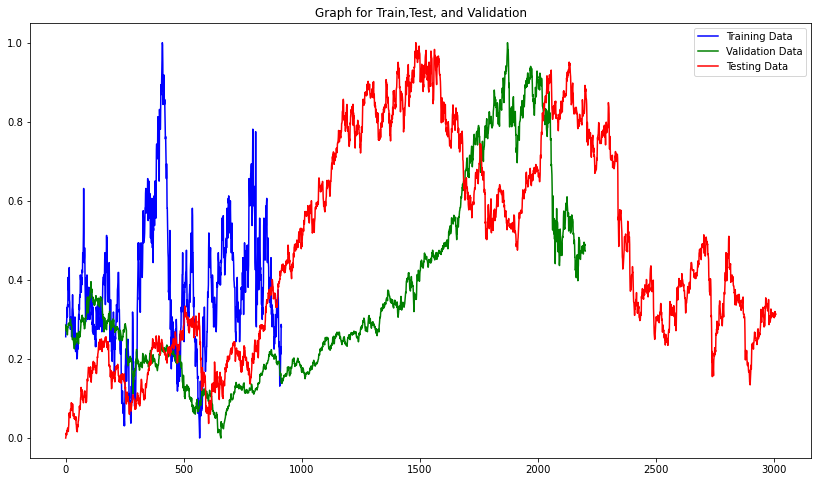

In [ ]:
%matplotlib inline

fig, ax = mplplt.subplots(figsize=(14,8))
ax.plot(Y,color='blue')
ax.set_title("Graph for Train,Test, and Validation")
ax.plot(Y_Validation, color= 'green')
ax.plot(Y_test,color='red')
ax.legend(("Training Data", "Validation Data", "Testing Data"))
mplplt.show()

In [ ]:
print(X_test.shape)

(3007, 11)


<h2 style="color:cadetblue"> Regression model</h2>

In [ ]:
def base_model1():
    input_dim = X.shape[1]
    output_dim = 1
    model = Sequential()
    model.add(Dense(128, input_dim= input_dim,kernel_initializer ='normal', activation= 'sigmoid'))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='mse', optimizer='adam', metrics=['MeanSquaredError',
        'AUC',])
    
    return model

In [ ]:
tb_callback = TensorBoard('./logs', update_freq=1)
model = KerasRegressor(build_fn=base_model1,  epochs=70, verbose=1, callbacks=[tb_callback])

In [ ]:
trained = model.fit(X,Y,validation_data=(X_Validation, Y_Validation),validation_batch_size=None)
y_hat = trained.model.predict(X_test)

Epoch 1/70
 1/29 [>.............................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244 - auc: 0.0000e+00WARNING:tensorflow:From C:\Users\19088\anaconda3\envs\Machine_learning\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
29/29 [==============================] - 1s 26ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - auc: 0.8050 - val_loss: 0.0453 - val_mean_squared_error: 0.0453 - val_auc: 0.9952
Epoch 2/70
29/29 [==============================] - 0s 7ms/step - loss: 0.0207 - mean_squared_error: 0.0207 - auc: 0.9622 - val_loss: 0.0352 - val_mean_squared_error: 0.0352 - val_auc: 0.9970
Epoch 3/70
29/29 [==============================] - 0s 6ms/step - loss: 0.0168 - mean_squared_error: 0.0168 - auc: 0.8045 - val_loss: 0.0277 - val_mean_squared_error: 0.0277 - val_auc: 0.9980
Epoch 4/7

Epoch 39/70
29/29 [==============================] - 0s 4ms/step - loss: 3.7375e-04 - mean_squared_error: 3.7375e-04 - auc: 0.9995 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_auc: 0.9993
Epoch 40/70
29/29 [==============================] - 0s 4ms/step - loss: 3.7926e-04 - mean_squared_error: 3.7926e-04 - auc: 0.9995 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_auc: 0.9995
Epoch 41/70
29/29 [==============================] - 0s 4ms/step - loss: 3.7585e-04 - mean_squared_error: 3.7585e-04 - auc: 0.9995 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_auc: 0.9993
Epoch 42/70
29/29 [==============================] - 0s 5ms/step - loss: 3.9656e-04 - mean_squared_error: 3.9656e-04 - auc: 0.9995 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_auc: 0.9995
Epoch 43/70
29/29 [==============================] - 0s 6ms/step - loss: 3.6955e-04 - mean_squared_error: 3.6955e-04 - auc: 0.9995 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_auc: 0.

In [ ]:
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir {'./logs'} --host=127.0.0.1

Reusing TensorBoard on port 6006 (pid 4236), started 2 days, 2:26:39 ago. (Use '!kill 4236' to kill it.)

In [ ]:
!taskkill /pid 13680 /f

ERROR: The process "13680" not found.


In [ ]:
callable_history = pd.DataFrame(trained.history)

,loss,mean_squared_error,auc,val_loss,val_mean_squared_error,val_auc
0,0.025662,0.025662,0.805038,0.045338,0.045338,0.995225
1,0.020668,0.020668,0.962212,0.035202,0.035202,0.997044
2,0.016848,0.016848,0.804491,0.027713,0.027713,0.997954
3,0.013707,0.013707,0.968784,0.022201,0.022201,0.996589
4,0.011073,0.011073,0.938116,0.018464,0.018464,0.997726
...,...,...,...,...,...,...
65,0.000367,0.000367,0.999452,0.001523,0.001523,1.000000
66,0.000364,0.000364,0.999452,0.001567,0.001567,0.999318
67,0.000368,0.000368,1.000000,0.001543,0.001543,0.999318
68,0.000361,0.000361,0.999452,0.001698,0.001698,0.999545


<h3 style="color:Chocolate">Graph for mean squared error</h3>

<h3 style="color:Crimson">Graph for accuracy</h3>

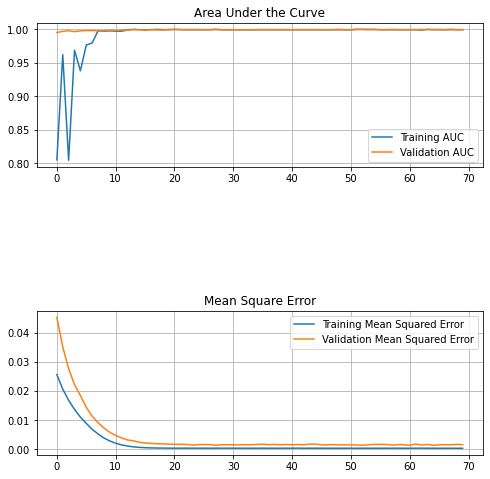

In [ ]:
%matplotlib inline
plot = pd.DataFrame(trained.history)
fig, [ax, ax1] = mplplt.subplots(nrows=2, figsize=(8,8))
ax.plot(plot["auc"])
ax.plot(plot["val_auc"])
ax.grid(True)
ax.legend(["Training AUC","Validation AUC"])
ax.set_title("Area Under the Curve")
ax1.plot(plot["mean_squared_error"])
ax1.plot(plot["val_mean_squared_error"])
ax1.legend(["Training Mean Squared Error", "Validation Mean Squared Error"])
ax1.grid(True)
ax1.set_title("Mean Square Error")
mplplt.subplots_adjust(left=None, bottom=.25, right=None, top=1,
                wspace=1, hspace=1)
mplplt.show()

###### Calculate the mean square error

In [ ]:
RMSE = mean_squared_error(y_hat,Y_test, squared= False)
RMSE

0.07678315059855478

# Prediction

In [ ]:
X_test_inverse, Y_test_predict, Y_test_inverse = X_test_scaler.inverse_transform(X_test),Y_test_scaler.inverse_transform(y_hat), Y_test_scaler.inverse_transform(Y_test)

In [ ]:
for i,j in zip(Y_test_predict,Y_test_inverse):
    print(i,j)

[10.948709] [8.578891]
[10.966354] [8.67082]
[11.069277] [8.87549]
[11.0900545] [8.790502]
[11.028228] [8.767952]
[11.059435] [8.787033]
[11.039082] [9.038675]
[11.072235] [8.984715]
[11.075851] [9.155595]
[11.003304] [9.011694]
[11.054355] [9.173581]
[10.989803] [8.964928]
[11.056383] [9.191567]
[11.180476] [9.40202]
[11.55064] [10.063958]
[11.501086] [9.939845]
[11.501495] [9.884085]
[11.503885] [10.042375]
[11.513745] [9.817531]
[11.451229] [9.785152]
[11.727679] [10.252827]
[11.771611] [10.283405]
[11.746146] [10.324776]
[11.788726] [10.310387]
[12.02433] [10.675531]
[11.872382] [10.40572]
[11.709917] [10.207856]
[11.790607] [10.36075]
[11.859652] [10.26182]
[11.901863] [10.603581]
[11.839217] [10.459682]
[11.542402] [9.92006]
[11.551662] [9.914663]
[11.483748] [9.866096]
[11.571645] [9.963228]
[11.6096] [10.027982]
[11.42813] [9.731191]
[11.401141] [9.756375]
[11.393787] [9.698814]
[11.334504] [9.722198]
[11.421304] [9.758171]
[11.39942] [9.716802]
[11.40179] [9.641253]
[11.44611]

[15.068104] [14.809352]
[15.065568] [14.62711]
[15.197151] [14.917561]
[15.220948] [14.959327]
[15.477199] [15.196627]
[15.355861] [15.03716]
[15.765309] [15.485181]
[15.743891] [15.443414]
[15.982075] [15.633253]
[16.474602] [15.978763]
[16.178953] [15.606676]
[15.539966] [15.301035]
[15.557219] [15.187133]
[15.210853] [14.62711]
[14.58654] [14.122136]
[14.424232] [14.279701]
[13.908442] [13.224195]
[13.643488] [13.321012]
[13.080212] [12.453448]
[12.714009] [12.432566]
[12.331462] [11.415029]
[12.407851] [12.210454]
[12.8037405] [12.375615]
[13.091008] [12.7477]
[12.958754] [12.565455]
[13.027538] [12.508503]
[12.4893675] [11.899118]
[12.272078] [11.650429]
[12.459912] [11.764332]
[12.659042] [12.354733]
[12.830366] [12.470534]
[12.523803] [11.876338]
[12.381679] [11.959867]
[12.734453] [12.33575]
[12.549416] [12.09845]
[12.717011] [12.214251]
[12.546215] [11.929493]
[12.135821] [11.454895]
[11.153446] [10.13931]
[11.422854] [10.479121]
[11.373175] [10.260806]
[11.319502] [10.093747]

[22.335922] [22.119865]
[22.869162] [22.384993]
[22.481808] [22.11183]
[22.782276] [22.198198]
[22.505768] [22.196192]
[22.364483] [21.886875]
[22.92366] [22.37495]
[23.146563] [22.646101]
[23.031178] [22.354862]
[21.858593] [21.3265]
[21.648989] [21.111589]
[20.833426] [20.727961]
[21.046495] [20.812319]
[21.7038] [21.372698]
[21.92175] [21.547438]
[21.739971] [21.424917]
[21.958384] [21.555471]
[21.696508] [21.322483]
[21.406916] [21.22607]
[21.07252] [20.768129]
[21.649982] [21.354618]
[21.925074] [21.515301]
[21.871624] [21.617735]
[22.545652] [22.224312]
[22.661371] [22.26247]
[22.739841] [22.284563]
[22.604862] [22.158028]
[22.676233] [22.224312]
[22.869911] [22.535631]
[22.883957] [22.395033]
[23.002935] [22.513536]
[22.956032] [22.429178]
[22.886639] [22.318712]
[22.977865] [22.59589]
[22.904661] [22.477383]
[22.902388] [22.441231]
[23.021746] [22.429178]
[23.82697] [23.282803]
[24.445358] [23.851215]
[24.528189] [24.001852]
[24.532862] [23.901428]
[24.498125] [23.754803]
[24.0

[28.682318] [29.949154]
[28.93023] [30.733292]
[28.974092] [30.76819]
[29.119282] [31.152046]
[29.218294] [31.306]
[29.205408] [31.375795]
[29.311174] [31.56259]
[28.959444] [31.080824]
[28.573278] [30.16239]
[28.611502] [30.634134]
[28.605228] [30.54855]
[28.33398] [29.809624]
[28.258598] [29.924427]
[28.32815] [29.959908]
[28.59813] [30.469229]
[28.468225] [30.016272]
[27.995245] [29.348316]
[27.877487] [29.179243]
[27.834044] [29.087399]
[28.635551] [30.865831]
[28.683294] [30.554813]
[28.273754] [29.987051]
[27.969522] [29.4506]
[28.119476] [29.7637]
[28.058702] [29.433897]
[28.535593] [30.61743]
[28.476685] [30.177]
[29.072702] [31.521259]
[29.058905] [31.352184]
[28.95686] [31.162235]
[28.932896] [31.101702]
[28.883814] [31.064127]
[28.298546] [29.671856]
[28.137228] [29.429726]
[28.237915] [29.617584]
[28.02717] [29.442245]
[27.437853] [28.398565]
[27.332127] [28.617741]
[27.555185] [28.609388]
[28.013256] [29.36084]
[28.84523] [31.112139]
[28.98265] [31.243639]
[29.091843] [31.

[24.74537] [26.4137]
[24.747223] [26.527399]
[24.51525] [25.853937]
[24.343992] [25.915159]
[24.192616] [25.512833]
[24.001251] [25.775221]
[23.791744] [25.267937]
[23.642582] [25.346653]
[23.735416] [25.294176]
[23.32518] [24.848118]
[22.885693] [24.270864]
[22.96478] [24.611969]
[22.919216] [24.375822]
[22.87737] [24.410805]
[23.186796] [24.716927]
[22.996561] [24.489521]
[22.845701] [24.498268]
[23.01206] [24.795639]
[23.612108] [25.162983]
[23.5433] [25.058029]
[23.894836] [25.626535]
[24.825363] [26.396206]
[24.635557] [26.238775]
[24.88085] [26.55364]
[25.007656] [26.579878]
[25.125435] [26.973459]
[25.444176] [27.279577]
[25.473919] [27.183369]
[25.232033] [26.90349]
[24.991272] [26.62361]
[24.751808] [26.369967]
[24.526905] [26.037609]
[24.363665] [26.046354]
[24.434431] [26.10758]
[24.457064] [26.098833]
[24.510815] [26.160055]
[24.455244] [26.037609]
[24.56331] [26.081339]
[24.653942] [26.4137]
[24.85613] [26.73731]
[24.996544] [26.606117]
[24.731937] [26.404955]
[24.783852] 

## Plot to see what prediction looks like

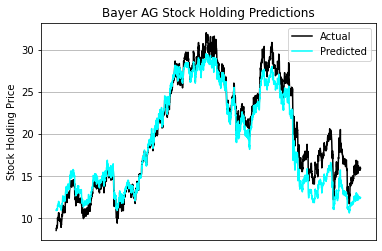

In [ ]:
fig, ax = mplplt.subplots()
ax.plot(test_df.index,Y_test_inverse, color="black")
ax.plot(test_df.index,Y_test_predict, color="cyan")
ax.grid(True)
ax.set_title("Bayer AG Stock Holding Predictions")
ax.set_ylabel("Stock Holding Price")
ax.axes.xaxis.set_visible(False)
ax.legend(["Actual","Predicted"])
mplplt.show()

### Prediction for closing price 

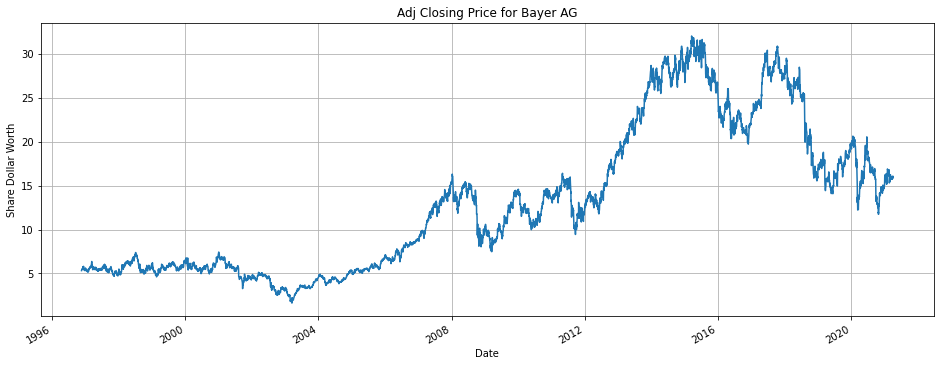

In [ ]:
master['Adj_Close_BAYRY'].plot(figsize=(16,6))
mplplt.grid(True)
mplplt.title("Adj Closing Price for Bayer AG")
mplplt.ylabel("Share Dollar Worth")
mplplt.show()

In [ ]:
master.rolling(7).mean().head(10)

,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
Date,,,,,,,,,,,,
1996-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-11-26,9.803571,9.834821,9.656250,9.803571,5.428910,52800.000000,4166.428502,4166.428502,4166.428502,4166.428502,4166.428502,0.0
1996-11-27,9.839286,9.870536,9.691964,9.839286,5.448688,44628.571429,4177.878488,4177.878488,4177.878488,4177.878488,4177.878488,0.0
1996-11-29,9.879464,9.928571,9.758929,9.879464,5.470937,44400.000000,4187.892787,4187.892787,4187.892787,4187.892787,4187.892787,0.0


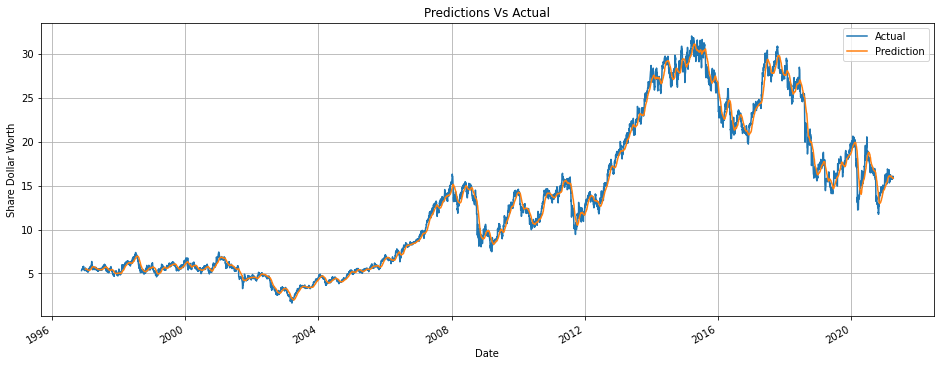

In [ ]:
master['Adj_Close_BAYRY'].plot(figsize=(16,6))
master.rolling(window=30).mean()['Adj_Close_BAYRY'].plot()
mplplt.grid(True)
mplplt.title("Predictions Vs Actual")
mplplt.legend(["Actual","Prediction"])
mplplt.ylabel("Share Dollar Worth")
mplplt.show()

In [ ]:
# Create a new dataframe with only the 'Close column

data = master.filter(['Adj_Close_BAYRY'])

# Convert the datafrome to a numpy array 
dataset = data.values

# Get the number of rows to train the model on 
training_data_len = int(np.ceil( len(dataset) * .8))

training_data_len

4911

In [ ]:
data

,Adj_Close_BAYRY
Date,
1996-11-18,5.330023
1996-11-19,5.399244
1996-11-20,5.399244
1996-11-21,5.416549
1996-11-22,5.433855
...,...
2021-04-05,16.080000
2021-04-06,16.030001
2021-04-07,15.980000


In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.1214685 ],
       [0.12374731],
       [0.12374731],
       ...,
       [0.47207418],
       [0.47042814],
       [0.47009893]])

In [ ]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data sets
x_train = [] # indepentant varriables
y_train = [] # dependent variables

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(np.array(x_train)[:,:5])
        print(np.array(y_train)[:5])


[[0.1214685  0.12374731 0.12374731 0.12431701 0.12488674]]
[0.13115347]
[[0.1214685  0.12374731 0.12374731 0.12431701 0.12488674]
 [0.12374731 0.12374731 0.12431701 0.12488674 0.12659582]]
[0.13115347 0.13058374]


In [ ]:
train_data

array([[0.1214685 ],
       [0.12374731],
       [0.12374731],
       ...,
       [0.65063768],
       [0.61744512],
       [0.63636204]])

In [ ]:
# Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(4851, 60, 1)

In [ ]:
x_train[:2,:5,:]

array([[[0.1214685 ],
        [0.12374731],
        [0.12374731],
        [0.12431701],
        [0.12488674]],

       [[0.12374731],
        [0.12374731],
        [0.12431701],
        [0.12488674],
        [0.12659582]]])

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4851/4851 [==============================] - 95s 20ms/step - loss: 9.6821e-04


In [ ]:
# Create the testing data set
# Create a new array containg scaled values from index 4851 to 5000
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [ ]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [ ]:
x_test.shape

(1227, 60, 1)

In [ ]:
x_test[:2,:5,:]

array([[[0.68292771],
        [0.68340878],
        [0.68430208],
        [0.68890622],
        [0.68753178]],

       [[0.68340878],
        [0.68430208],
        [0.68890622],
        [0.68753178],
        [0.684096  ]]])

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean square error (RMSE)
RMSE = np.sqrt(np.mean(predictions - y_test )**2)
RMSE

0.13670273479597844

<ipython-input-61-39bebef8ebd8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


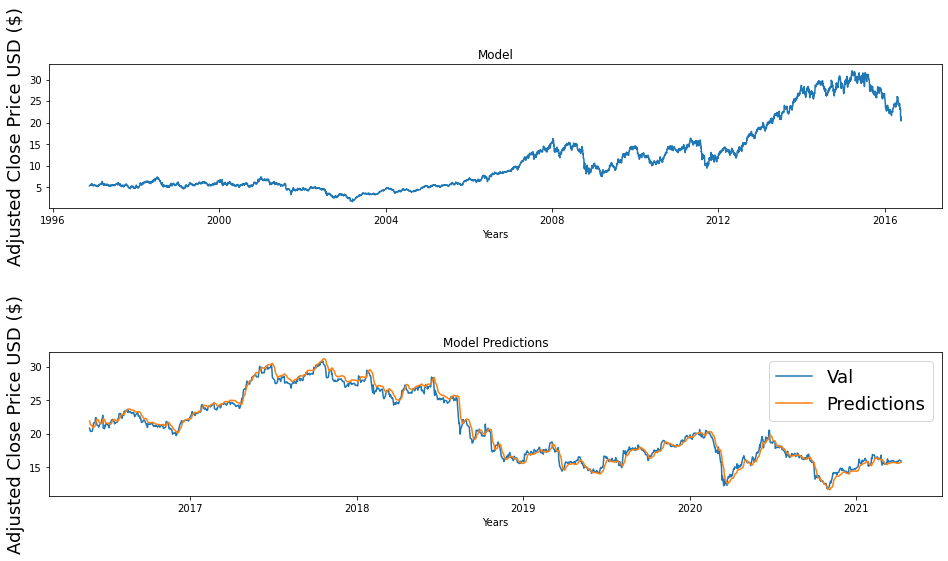

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
fig, [ax, ax1] = mplplt.subplots(nrows=2,figsize=(16,8))
ax.set_title('Model')
ax.set_xlabel('Years')
ax.set_ylabel('Adjusted Close Price USD ($)', fontsize=18)
ax.plot(train['Adj_Close_BAYRY'])
ax1.legend(['Train'], loc = 'lower right')
ax1.set_title("Model Predictions")
ax1.set_xlabel("Years")
ax1.set_ylabel('Adjusted Close Price USD ($)', fontsize=18)
ax1.plot(valid[['Adj_Close_BAYRY', 'Predictions']])
ax1.legend(['Val', 'Predictions'], fontsize= 18)
mplplt.subplots_adjust(left=None, bottom=.25, right=None, top=1,
                wspace=1, hspace=1)
mplplt.show()

In [ ]:
# show the valid and prediction prices
valid

,Adj_Close_BAYRY,Predictions
Date,,
2016-05-25,20.823006,21.893206
2016-05-26,20.594440,21.599564
2016-05-27,20.340240,21.359123
2016-05-31,20.378689,21.136396
2016-06-01,20.688429,20.966934
...,...,...
2021-04-05,16.080000,15.588552
2021-04-06,16.030001,15.639606
2021-04-07,15.980000,15.694803


In [ ]:
BAYRY_stock_hist = pd.read_csv("C:\\Users\\19088\\Desktop\\Math3790\\Assignments\\Final_Project\\project_data_finance\\Data\\MASTERBAYRY.csv" , parse_dates =True)
NYSE_stock_hist = pd.read_csv("C:\\Users\\19088\\Desktop\\Math3790\\Assignments\\Final_Project\\project_data_finance\\Data\\NYAIndexMaster.csv", parse_dates =True)

In [ ]:
BAYRY_stock_hist.columns = ["Date","Open_BAYRY", "High_BAYRY","Low_BAYRY","Close_BAYRY", "Adj_Close_BAYRY","Volume_BAYRY"]
NYSE_stock_hist.columns = ["Date","Open_NYSE", "High_NYSE","Low_NYSE","Close_NYSE", "Adj_Close_NYSE","Volume_NYSE"]

In [ ]:
Master = BAYRY_stock_hist.merge(NYSE_stock_hist, how= "inner", on= "Date")
Master['Date'] = pd.to_datetime(Master['Date'])
Master.tail(2)

,Date,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
6136,2021-04-08,15.97,15.98,15.90,15.93,15.93,306000,15838.849609,15894.799805,15812.370117,15886.559570,15886.559570,3901910000
6137,2021-04-09,15.92,15.94,15.87,15.92,15.92,207000,15886.559570,15956.379883,15865.599609,15956.370117,15956.370117,3634910000


In [ ]:
pd.DataFrame(Master.dtypes).T

,Date,Open_BAYRY,High_BAYRY,Low_BAYRY,Close_BAYRY,Adj_Close_BAYRY,Volume_BAYRY,Open_NYSE,High_NYSE,Low_NYSE,Close_NYSE,Adj_Close_NYSE,Volume_NYSE
0,datetime64[ns],float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64


In [ ]:
import math
# Get the quote
actual_price = valid.tail(1)

# Create a new dataframe

new_df = Master.filter(['Adj_Close_BAYRY'])

# Get the last 60 day adj closing price value and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []
# Append the past 60 days 
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpyarray
X_test = np.array(X_test)

# Reshape the data 
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Get the predicted scaled price

pred_price = model.predict(X_test)

# undo the scaling
pred_price = scaler.inverse_transform(pred_price)


In [ ]:
print(actual_price)
print()
print(pred_price)

            Adj_Close_BAYRY  Predictions
Date                                    
2021-04-09            15.92    15.749585

[[15.751445]]


In [2]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/Stock_Market_Prediction.ipynb" --to markdown  --output-dir markdown

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Stock_Market_Prediction.ipynb to markdown
[NbConvertApp] Support files will be in Stock_Market_Prediction_files/
[NbConvertApp] Making directory markdown/Stock_Market_Prediction_files
[NbConvertApp] Making directory markdown/Stock_Market_Prediction_files
[NbConvertApp] Making directory markdown/Stock_Market_Prediction_files
[NbConvertApp] Making directory markdown/Stock_Market_Prediction_files
[NbConvertApp] Making directory markdown/Stock_Market_Prediction_files
[NbConvertApp] Making directory markdown/Stock_Market_Prediction_files
[NbConvertApp] Writing 154842 bytes to markdown/Stock_Market_Prediction.md


In [3]:
!zip -r /content/file.zip /content/markdown

  adding: content/markdown/ (stored 0%)
  adding: content/markdown/Stock_Market_Prediction.md (deflated 75%)
  adding: content/markdown/Stock_Market_Prediction_files/ (stored 0%)
  adding: content/markdown/Stock_Market_Prediction_files/Stock_Market_Prediction_64_0.png (deflated 2%)
  adding: content/markdown/Stock_Market_Prediction_files/Stock_Market_Prediction_62_0.png (deflated 3%)
  adding: content/markdown/Stock_Market_Prediction_files/Stock_Market_Prediction_60_0.png (deflated 1%)
  adding: content/markdown/Stock_Market_Prediction_files/Stock_Market_Prediction_53_0.png (deflated 7%)
  adding: content/markdown/Stock_Market_Prediction_files/Stock_Market_Prediction_84_1.png (deflated 3%)
  adding: content/markdown/Stock_Market_Prediction_files/Stock_Market_Prediction_40_0.png (deflated 2%)


In [4]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>